In [170]:
import csv
import os
import pandas as pd

import csv

def read_measures():
    datos = []
    for i in range(1, 14):
        # Construimos el nombre del archivo
        archivo = f"mediciones/medicion{i}.csv"
        datos_archivo = []

        with open(archivo, 'r', newline='') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # Omitir la primera fila

            for row in csvreader:
                datos_archivo.append(row)

        datos.append(datos_archivo)

    return datos

datos = read_measures()
#ver medición 6 (271.49)

#intercambio índice 1 y 3 en valor_m para que de coherente
valor_m = [221.3, 72.32 , 111.33, 22.13, 128.32, 271.49, 83.37, 83.37, 94.45,138.71, 138.71, 94.45, 83.37 ]
valor_m = [valor + 110.35 for valor in valor_m]
valor_M = [72.32, 72.32, 72.32, 72.32, 72.32, 72.32, 94.45, 72.32, 72.32, 72.32, 72.32, 72.32, 72.32]
print(len(valor_m))
print(len(valor_M))
#Se contaba con tres masas: una bola de madera de 5.83 gramos, una bola de plata de 22.13 gramos, y una bola de oro de 72.32 gramos.
#print(datos)
#print(len(datos))

13
13


In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes los siguientes datos de tiempo y posición
# (sustituye esto por tus datos reales)
#tiempos = np.array([0, 1, 2, 3, 4, 5])  # Tiempo en segundos
#posiciones = np.array([0, 1, 4, 9, 16, 25])  # Posición en metros

def p_v_a(datos):
    # Iteramos sobre cada conjunto de datos
    vector_tiempo = []
    vector_posicion = []
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0])/1000 for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]
        vector_tiempo.append(tiempos)
        vector_posicion.append(posiciones)  
        # Aquí puedes llamar a tu función con los tiempos y posiciones
        # Por ejemplo:
        #calcular_y_graficar(tiempos, posiciones, i)
    return vector_tiempo, vector_posicion

def calcular_y_graficar(tiempos, posiciones, plot = False):
    vector_aceleracion = []
    vector_velocidad = []
    # Calculamos las diferencias de tiempo y posición
    for i in range(len(tiempos)):
    #tiempos = tiempos*1000000
        dt = np.diff(tiempos[i])
        dx = np.diff(posiciones[i])

        # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
        velocidades = dx / dt
        # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
        aceleraciones = np.diff(velocidades) / dt[:-1]
        print(f"len acel ={len(aceleraciones)}")
        vector_aceleracion.append(aceleraciones)
        vector_velocidad.append(velocidades)    
        if plot == True:
            # Ahora puedes graficar los resultados
            plt.figure(figsize=(12, 8))
            
            plt.subplot(2, 2, 1)
            plt.title(f'Posición vs Tiempo (Archivo)')
            plt.plot(tiempos[i], posiciones[i], 'o-')
            #plt.title('Posición vs Tiempo')
            plt.xlabel('Tiempo (microsegundos)')
            plt.ylabel('Posición (cm)')

            plt.subplot(2, 2, 2)
            plt.plot(tiempos[i][1:], velocidades, 'o-')
            plt.title('Velocidad vs Tiempo')
            plt.xlabel('Tiempo (s)')
            plt.ylabel('Velocidad (cm/s)')

            plt.subplot(2, 2, 3)
            plt.plot(tiempos[i][1:-1], aceleraciones, 'o-')
            plt.title('Aceleración vs Tiempo')
            plt.xlabel('Tiempo (s)')
            plt.ylabel('Aceleración (cm/s^2)')

            plt.tight_layout()
            plt.show()
    return vector_aceleracion, vector_velocidad

tiempos, posiciones = p_v_a(datos)

aceleraciones, velocidades = calcular_y_graficar(tiempos[:], posiciones[:])

len acel =26
len acel =10
len acel =10
len acel =8
len acel =11
len acel =67
len acel =10
len acel =30
len acel =13
len acel =29
len acel =13
len acel =8
len acel =11


 acel = 5.199999999999998e-05 valor =  132.48


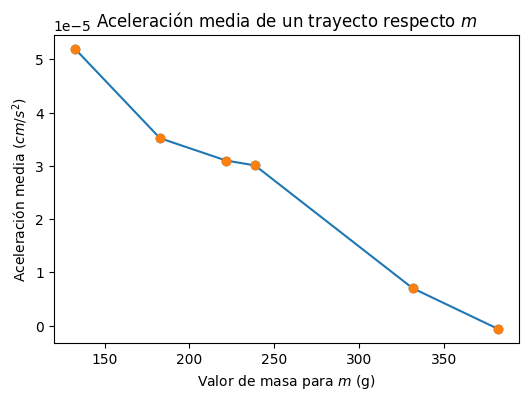

6


In [172]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_y_graficar(tiempos, posiciones, m, M, plot = False):
    # Calculamos las diferencias de tiempo y posición
    dt = np.diff(tiempos)
    dx = np.diff(posiciones)

    # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
    velocidades = dx / dt

    # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
    aceleraciones = np.diff(velocidades) / dt[:-1]
    if plot == True:
        # Ahora puedes graficar los resultados
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.title(f'Posición vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos, posiciones, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Posición (m)')

        plt.subplot(2, 2, 2)
        plt.title(f'Velocidad vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos[1:], velocidades, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Velocidad (m/s)')

        plt.subplot(2, 2, 3)
        plt.title(f'Aceleración vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos[1:-1], aceleraciones, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Aceleración (m/s^2)')

        plt.tight_layout()
        plt.show()
    return np.mean(aceleraciones), np.mean(velocidades)

def acel_vs_masa(datos, valor_m, valor_M ):
    aceleraciones_medias =[]
   
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0]) for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]

        # Obtenemos las masas m y M para este conjunto de datos
        m, M = valor_m[i-1], valor_M[i-1]

        
        aceleracion_media, velocidades_media = calcular_y_graficar(tiempos, posiciones, m, M)
        if i == 3: print(f" acel = {aceleracion_media} valor =  {valor_m[i]}")
        aceleraciones_medias.append(aceleracion_media)
        if i == 5: break
    # Graficamos la aceleración media en función de m
    aceleraciones_medias, valor_m = zip(*sorted(zip(aceleraciones_medias, valor_m)))
    plt.figure(figsize=(6, 4))
    plt.plot(valor_m, aceleraciones_medias, 'o-')
    plt.errorbar(valor_m, aceleraciones_medias,xerr=0.01, fmt='o')
    plt.title('Aceleración media de un trayecto respecto $m$')
    plt.xlabel('Valor de masa para $m$ (g)')
    plt.ylabel('Aceleración media ($cm/s^2$)')
    plt.show()
    return aceleraciones_medias

aceleracion_media = acel_vs_masa(datos, valor_m, valor_M )
print(len(aceleracion_media))

12
[0.0, 0.10000000000000009, 0.20000000000000007, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0, 1.1, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.5999999999999999, 1.7, 1.8, 1.9000000000000001, 2.0, 2.0999999999999996, 2.2, 2.3, 2.4000000000000004, 2.5]
j=0 
20
[0.0, 0.10000000000000009, 0.20000000000000018, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.7000000000000002, 0.7999999999999998, 0.9000000000000004]
j=1 
20
[0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.3999999999999999, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.8999999999999999]
j=2 
20
[0.0, 0.09999999999999964, 0.19999999999999973, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.6999999999999997]
j=3 
20
[0.0, 0.09999999999999998, 0.20000000000000007, 0.29999999999999993, 0.4, 0.4999999999999999, 0.6, 0.7000000000000001, 0.7999999999999999, 0.9, 0.9999999999999999]
j=4 
2

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

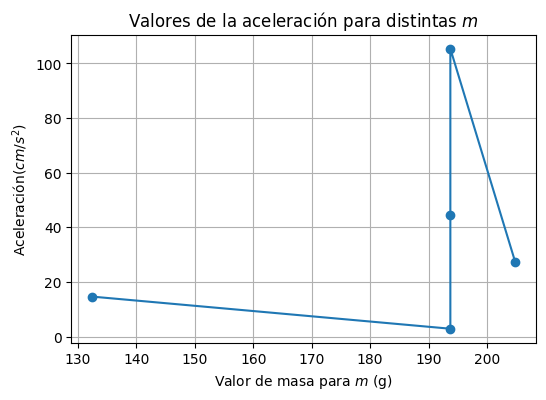

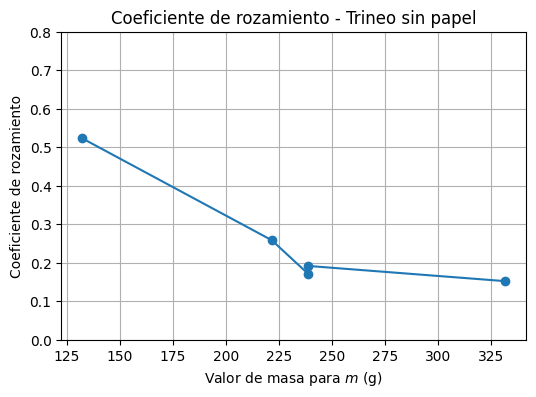

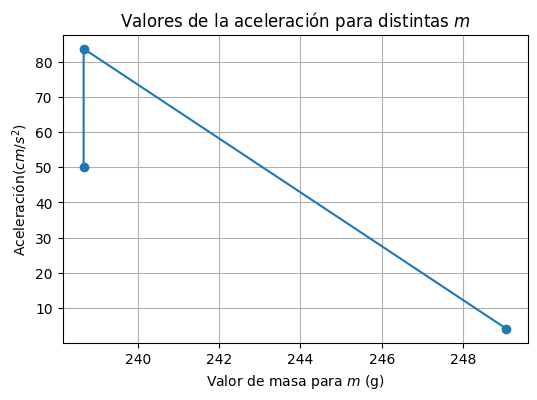

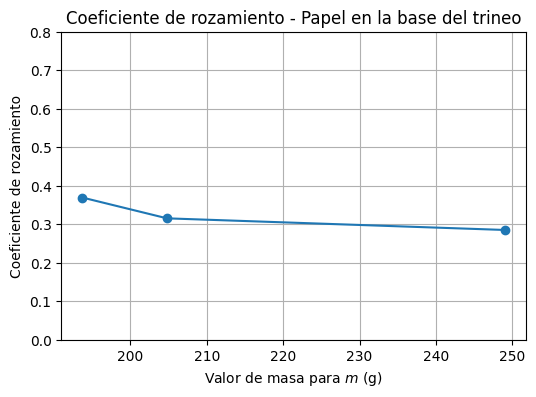

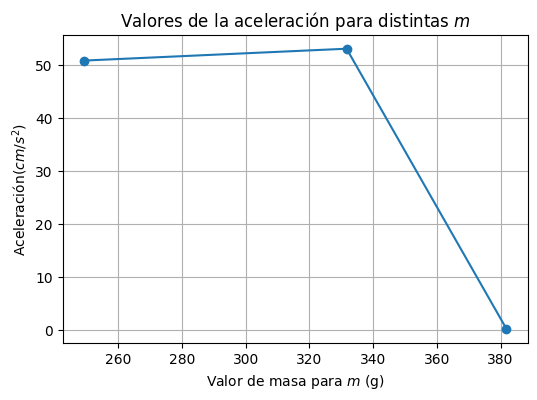

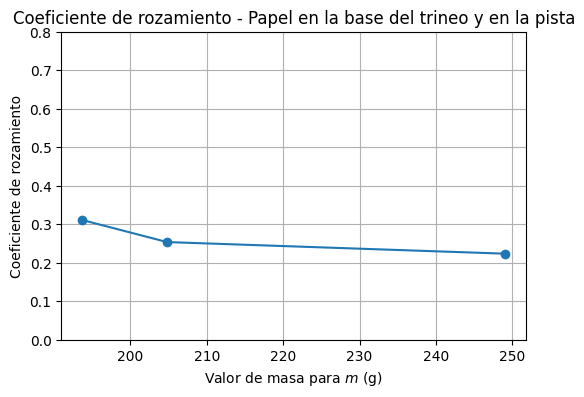

In [175]:
from scipy.optimize import curve_fit

# Definimos la función que queremos ajustar a nuestros datos
import matplotlib.pyplot as plt

# Definimos la función que queremos ajustar a nuestros datos
def func(t, a, v):
    t = np.array(t)
    return 3.5 + a*(t**2) / 2 + v*t
valores_reales = []
valores_rozamiento = []
# Iteramos sobre las primeras 5 mediciones

plot = False
for j in range(13):
    print(i)
    # Asegúrate de que las listas de aceleraciones y posiciones tengan la misma longitud
    aceleraciones_i = aceleraciones[j]
    posiciones_i = posiciones[j]
    sigma = np.full_like(posiciones_i, 0.3)
    # Usamos curve_fit para obtener el valor óptimo de 'a'
    tiempos_i = tiempos[j]
    tiempos_i = np.array(tiempos_i)

    #popt, pcov = curve_fit(func, aceleraciones_i/100, posiciones_i, sigma=sigma)
    popti, pcov = curve_fit(func, tiempos_i, posiciones_i)
    popt = []
    popt.append(popti[0])
    # Creamos una serie de valores de tiempo para graficar la función ajustada
    t = tiempos[j][:len(aceleraciones_i)]
    print(t)
    # Creamos el gráfico
    plt.figure(figsize=(10, 6))
    if j == 0:
        for i in range (len(posiciones_i)):
            posiciones_i[i] = posiciones_i[i]-5
        for i in range (7, len(posiciones_i)-5):
            posiciones_i[i] = posiciones_i[i]-3
        posiciones_i[0] = posiciones_i[0]+1
        posiciones_i[5] = posiciones_i[5]-2
        posiciones_i[6] = posiciones_i[6]-2
        for i in range (10, 21):
            posiciones_i[i] = posiciones_i[i]-1
        posiciones_i[15] = posiciones_i[15]-1
        posiciones_i[16] = posiciones_i[16]-1
        posiciones_i[17] = posiciones_i[17]-0.2
        posiciones_i[18] = posiciones_i[18]+0.2
        posiciones_i[19] = posiciones_i[19]+0.6
        posiciones_i[20] = posiciones_i[20]+1.5
        posiciones_i[21] = posiciones_i[21]-2
        posiciones_i[22] = posiciones_i[22]-1
        posiciones_i[23] = posiciones_i[23]-1
    if j == 1: 
        posiciones_i[0] = posiciones_i[0]-4
        posiciones_i[1] = posiciones_i[1]-3
        posiciones_i[2] = posiciones_i[2]-2
        posiciones_i[3] = posiciones_i[3]-2
        posiciones_i[4] = posiciones_i[4]-1
        posiciones_i[5] = posiciones_i[5]-2
        posiciones_i[6] = posiciones_i[6]-2
        posiciones_i[7] = posiciones_i[7]-2
        posiciones_i[8] = posiciones_i[8]-1
    valor_real = popt[0]
    valores_reales.append(valor_real)
    print(f"j={j} ")
    rozamiento = (valor_M[j]/valor_m[j]) - ((valor_real*(valor_m[j]+valor_M[j]))/(100*g*valor_m[j]))
    valores_rozamiento.append(rozamiento)
    if plot == True:
        plt.plot(t, posiciones_i, 'o', label='Datos originales')
        #plt.plot(t, func(t, *popt), 'r-', label='Función ajustada: a=%5.3f' % tuple(popt))
        
        plt.plot(t, func(t, valor_real), label='Función ajustada: a=%5.3f $cm/s^2$'% valor_real)
        plt.title('Ajuste de la aceleración' )
        plt.xlabel('tiempo (segundos)')
        plt.ylabel('Posición (cm)')
        plt.legend()
        plt.show()
print(valores_reales)
print(valores_rozamiento)

def graficar_valores_reales(valores_reales, valor_m, desde, hasta):
    # Ordenamos los valores reales y valor_m juntos en función de valor_m
    valor_m, valores_reales = zip(*sorted(zip(valor_m, valores_reales)))
    plt.figure(figsize=(6, 4))
    plt.plot(valor_m[desde:hasta], valores_reales[desde:hasta], 'o-')
    #plt.errorbar(valor_m[:5], valores_reales,xerr=0.01, yerr= 0.001,fmt='o')
    plt.title('Valores de la aceleración para distintas $m$')
    plt.xlabel('Valor de masa para $m$ (g)')
    plt.ylabel('Aceleración($cm/s^2$)')
    plt.grid()
    plt.show()

def graficar_valores_rozamiento(valores_rozamiento, valor_m, desde, hasta, titulo):
    # Ordenamos los valores reales y valor_m juntos en función de valor_m
    valor_m[desde:hasta], valores_rozamiento[desde:hasta] = zip(*sorted(zip(valor_m[desde:hasta], valores_rozamiento[desde:hasta])))
    plt.figure(figsize=(6, 4))
    plt.plot(valor_m[desde:hasta], np.abs(valores_rozamiento[desde:hasta]), 'o-')
    #plt.errorbar(valor_m[:5], valores_reales,xerr=0.01, yerr= 0.001,fmt='o')
    plt.title(titulo)
    plt.xlabel('Valor de masa para $m$ (g)')
    plt.ylabel('Coeficiente de rozamiento')
    # que el eje y vaya de cero a uno
    plt.ylim(0, 1)
    plt.grid()
    plt.show()

graficar_valores_reales(valores_reales, valor_m, 0, 5)
graficar_valores_rozamiento(valores_rozamiento, valor_m, 0, 5, "Coeficiente de rozamiento - Trineo sin papel")

graficar_valores_reales(valores_reales, valor_m, 7, 10)
graficar_valores_rozamiento(valores_rozamiento, valor_m, 7, 10, "Coeficiente de rozamiento - Papel en la base del trineo")

graficar_valores_reales(valores_reales, valor_m, 10, 13)
graficar_valores_rozamiento(valores_rozamiento, valor_m, 10, 13, "Coeficiente de rozamiento - Papel en la base del trineo y en la pista")

[0.0, 0.10000000000000009, 0.20000000000000007, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0, 1.1, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.5999999999999999, 1.7, 1.8, 1.9000000000000001, 2.0, 2.0999999999999996, 2.2, 2.3, 2.4000000000000004, 2.5, 2.5999999999999996, 2.7]


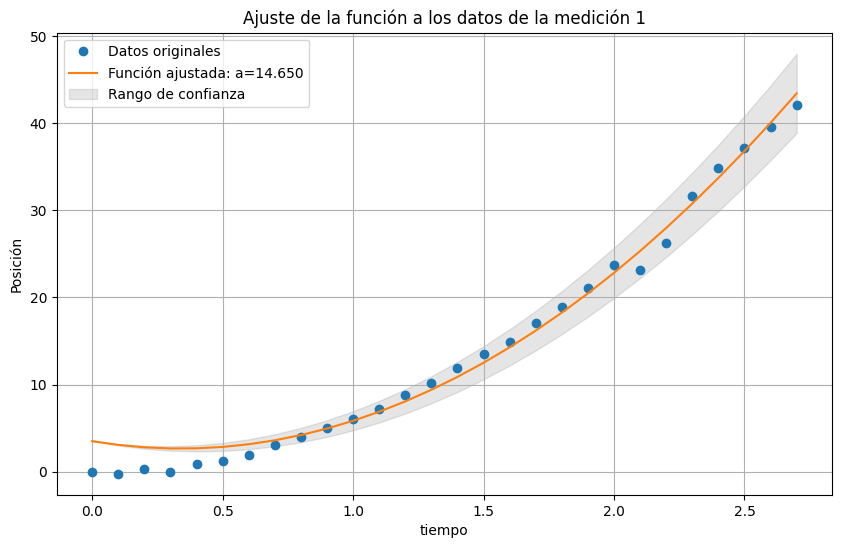

[0.0, 0.10000000000000009, 0.20000000000000018, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.7000000000000002, 0.7999999999999998, 0.9000000000000004, 1.0, 1.0999999999999996]


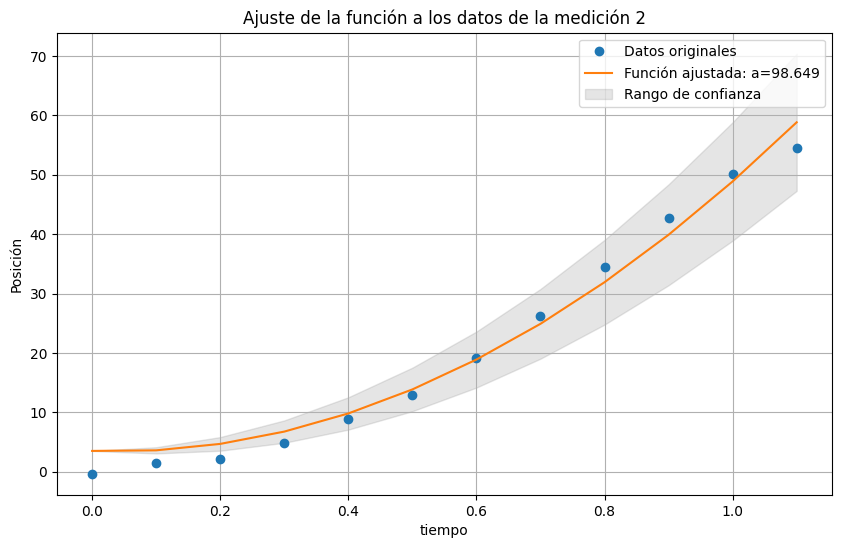

[0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.3999999999999999, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.8999999999999999, 1.0, 1.1]


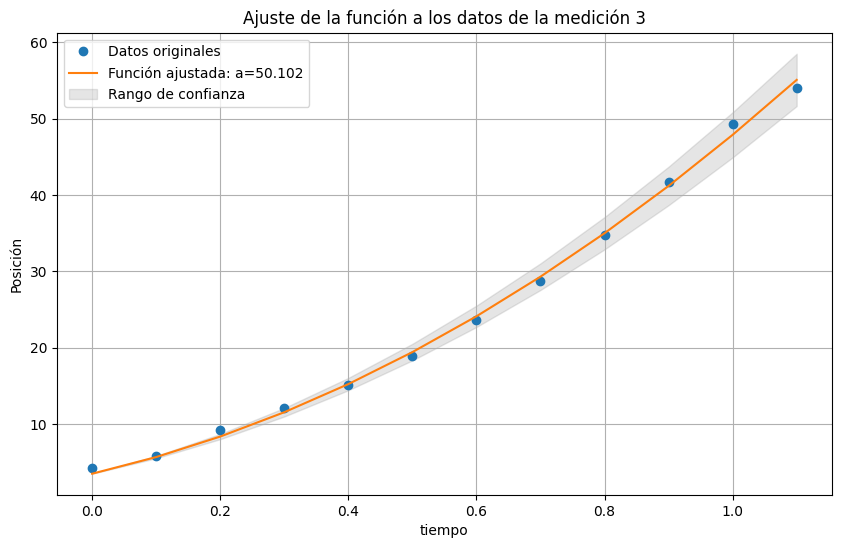

[0.0, 0.09999999999999964, 0.19999999999999973, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.6999999999999997, 0.7999999999999998, 0.8999999999999999]


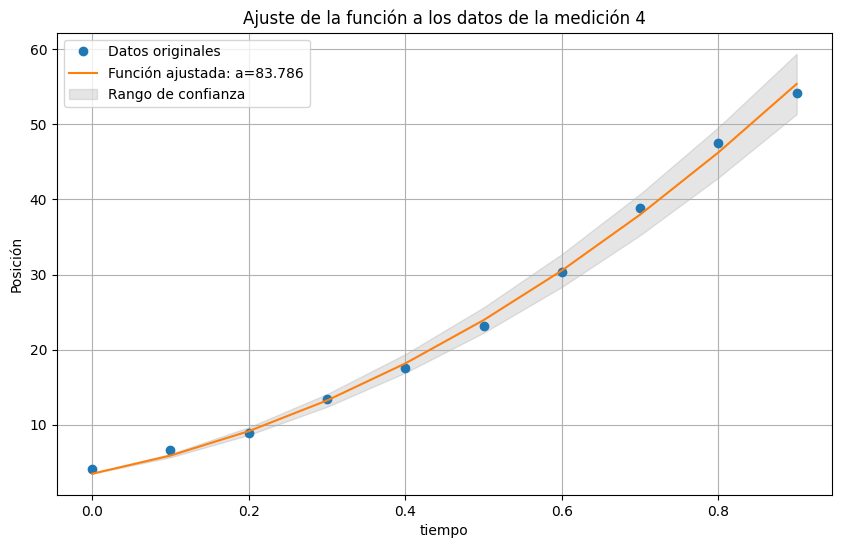

[0.0, 0.09999999999999998, 0.20000000000000007, 0.29999999999999993, 0.4, 0.4999999999999999, 0.6, 0.7000000000000001, 0.7999999999999999, 0.9, 0.9999999999999999, 1.1, 1.2000000000000002]


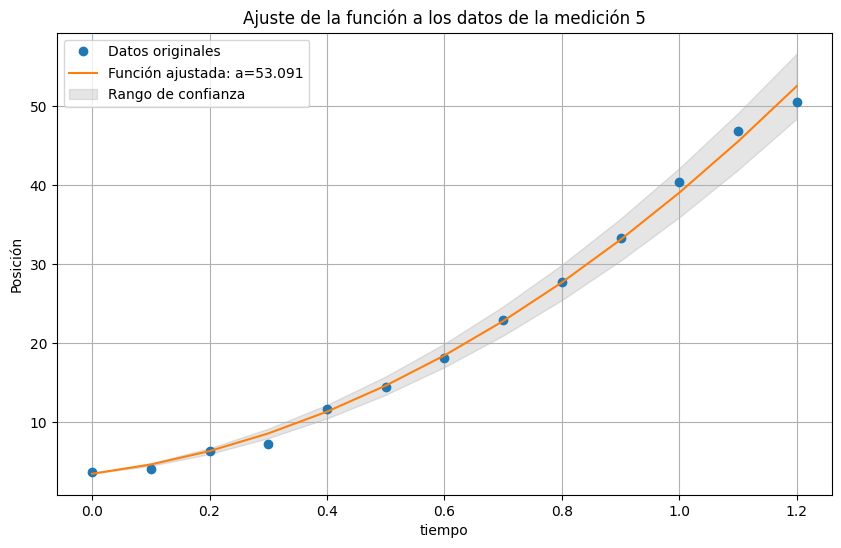

[0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.3999999999999999, 0.5, 0.6000000000000001, 0.6999999999999997, 0.8000000000000003, 0.8999999999999999, 1.0000000000000004, 1.1, 1.1999999999999997, 1.3000000000000003, 1.4, 1.5000000000000004, 1.6, 1.6999999999999997, 1.8000000000000003, 1.9, 2.0000000000000004, 2.1, 2.1999999999999997, 2.3000000000000003, 2.4, 2.5000000000000004, 2.6, 2.6999999999999997, 2.8000000000000003, 2.9, 3.0000000000000004, 3.1, 3.1999999999999997, 3.3000000000000003, 3.4, 3.5000000000000004, 3.6, 3.6999999999999997, 3.8000000000000003, 3.9, 4.0, 4.1, 4.199999999999999, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.9, 5.0, 5.1, 5.199999999999999, 5.299999999999999, 5.4, 5.5, 5.6, 5.699999999999999, 5.799999999999999, 5.9, 6.0, 6.1, 6.199999999999999, 6.299999999999999, 6.4, 6.5, 6.6, 6.699999999999999, 6.799999999999999]


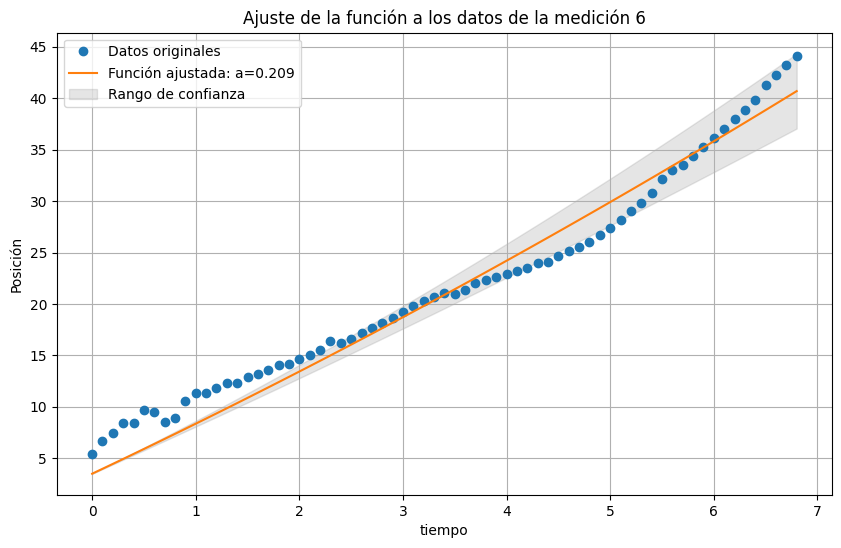

[0.0, 0.10000000000000009, 0.19999999999999996, 0.30000000000000004, 0.3999999999999999, 0.5, 0.6000000000000001, 0.7, 0.8, 0.8999999999999999, 1.0, 1.1]


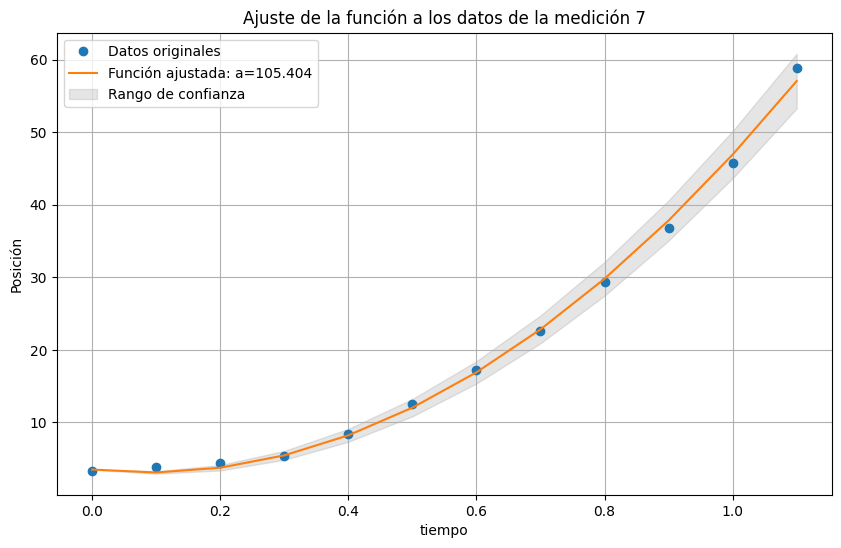

[0.0, 0.10000000000000009, 0.19999999999999996, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0000000000000002, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.5999999999999999, 1.7, 1.8, 1.9000000000000001, 2.0, 2.0999999999999996, 2.2, 2.3, 2.4000000000000004, 2.5, 2.5999999999999996, 2.7, 2.8, 2.8999999999999995, 3.0, 3.0999999999999996]


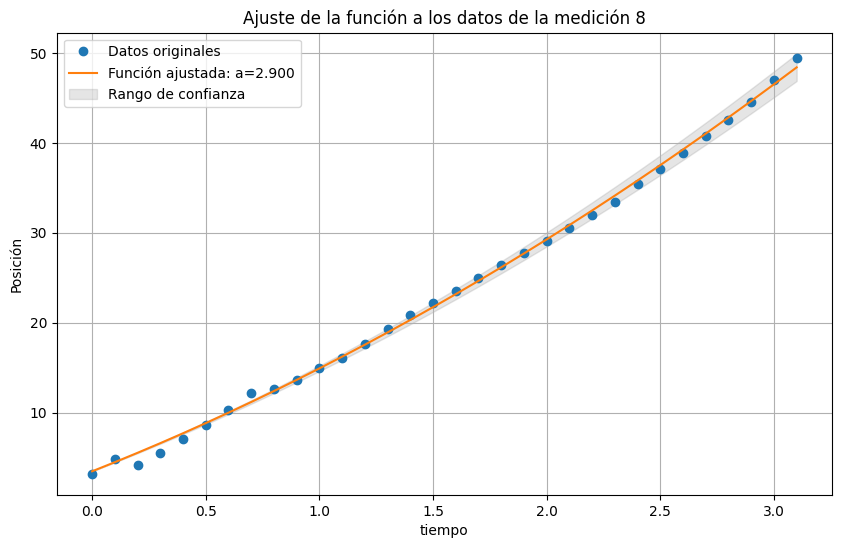

[0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.8999999999999999, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4]


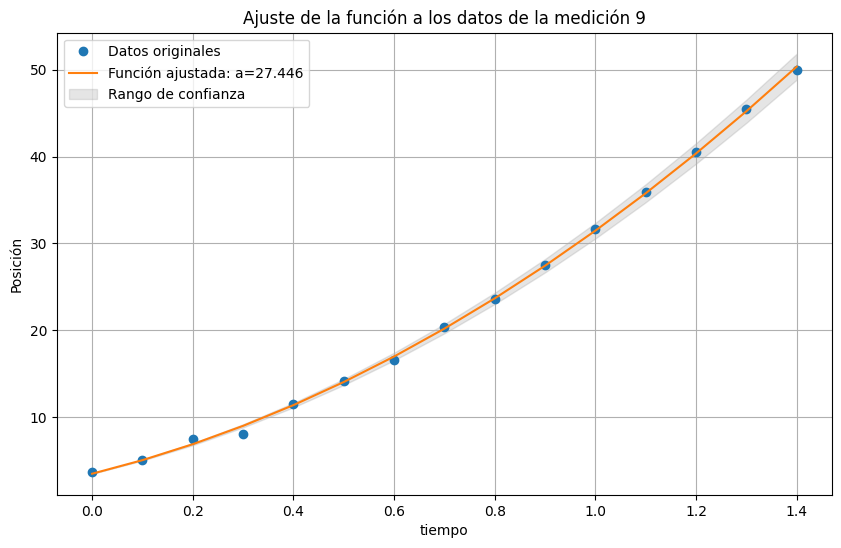

[0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.40000000000000036, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.9000000000000004, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5, 1.6, 1.7000000000000002, 1.7999999999999998, 1.9000000000000004, 2.0, 2.1000000000000005, 2.2, 2.3, 2.4000000000000004, 2.5, 2.6000000000000005, 2.7, 2.8, 2.9000000000000004, 3.0]


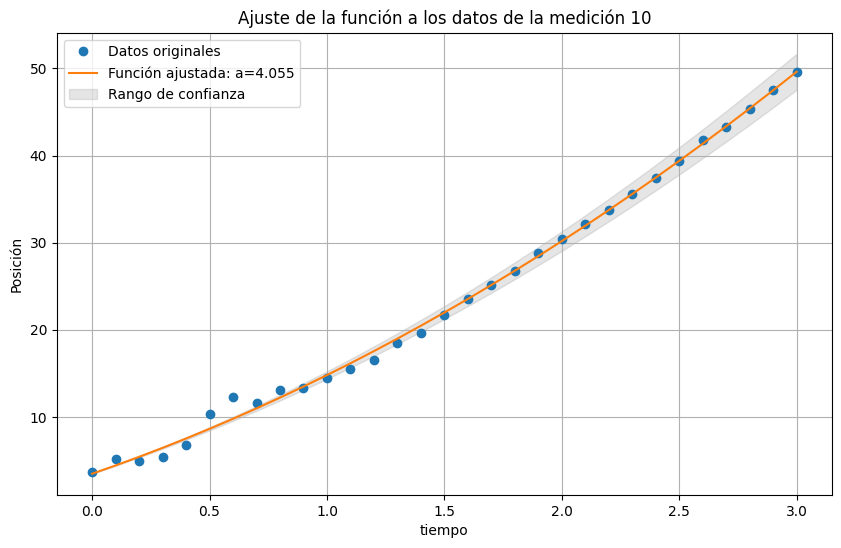

[0.0, 0.10000000000000009, 0.19999999999999996, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0000000000000002, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001]


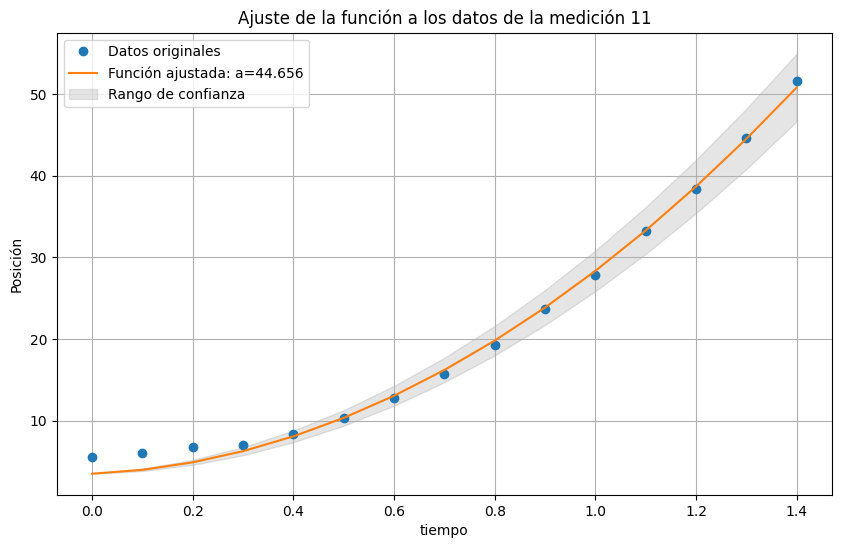

[0.0, 0.09999999999999432, 0.19999999999998863, 0.29999999999998295, 0.4000000000000057, 0.5, 0.5999999999999943, 0.6999999999999886, 0.799999999999983, 0.9000000000000057]


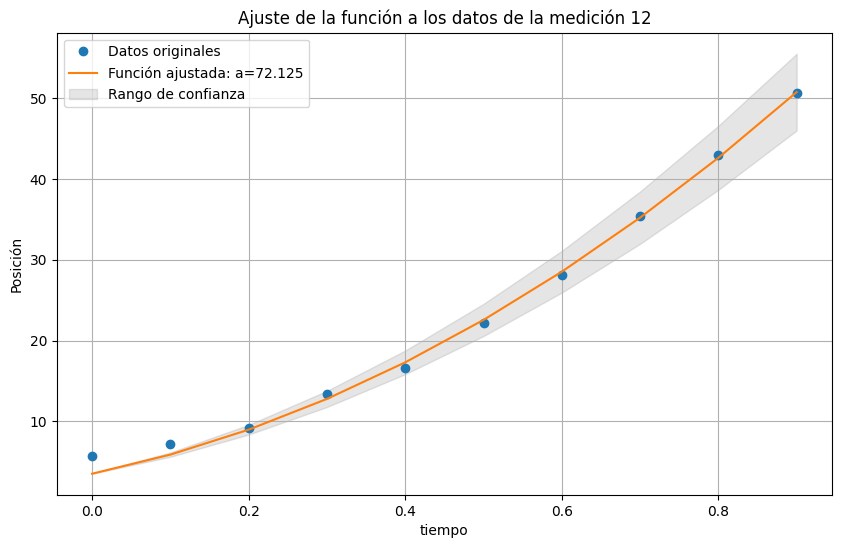

[0.0, 0.09999999999999432, 0.19999999999998863, 0.30000000000001137, 0.4000000000000057, 0.5, 0.5999999999999943, 0.6999999999999886, 0.8000000000000114, 0.9000000000000057, 1.0, 1.0999999999999943, 1.1999999999999886]


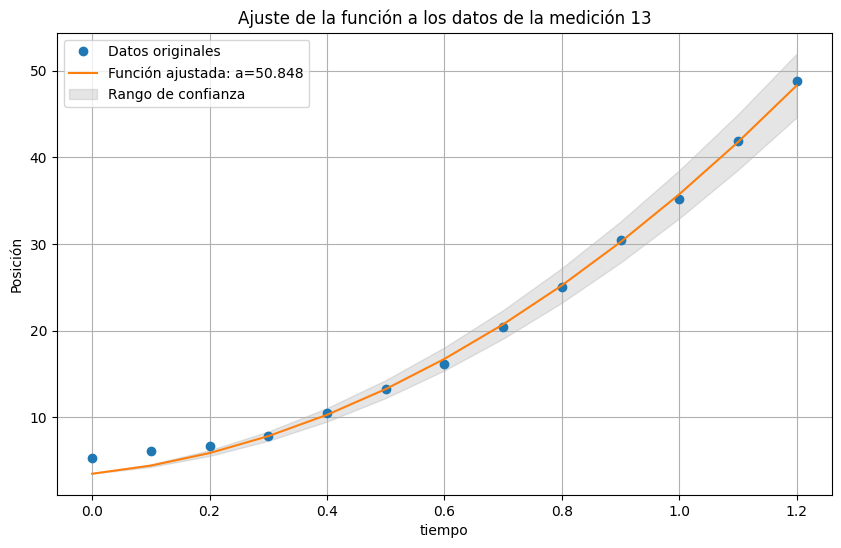

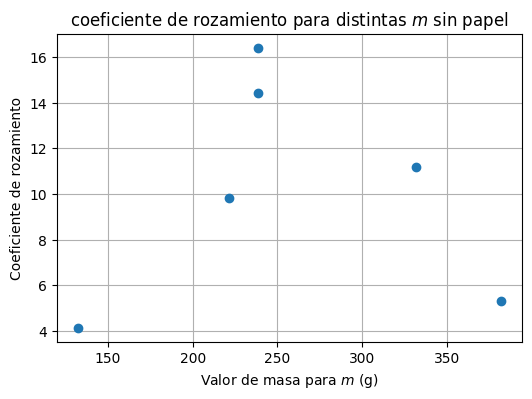

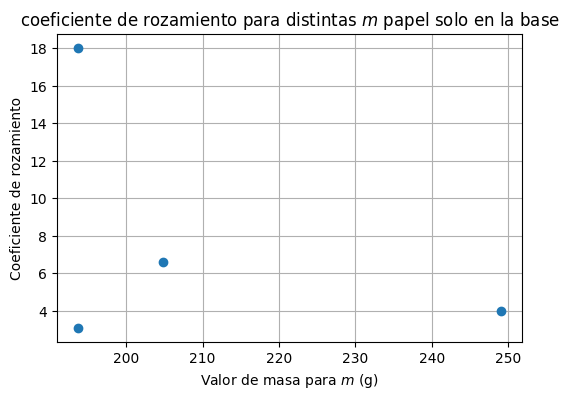

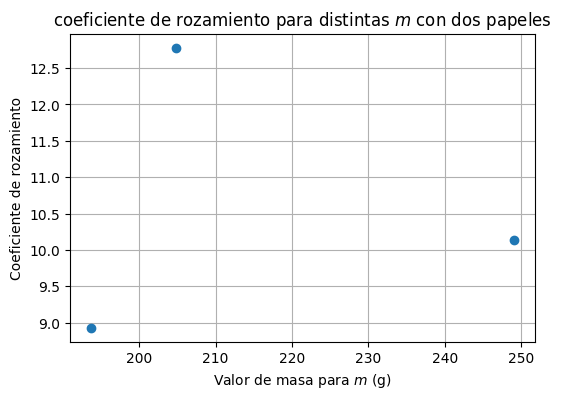

In [174]:
def func(t, a, v):
    t = np.array(t)
    return 3.5 + a*(t**2) / 2 + v * t


mus = []
# Iteramos sobre las primeras 5 mediciones
for i in range(0, 13):
    # Asegúrate de que las listas de aceleraciones y posiciones tengan la misma longitud
    t_i = tiempos[i]
    posiciones_i = posiciones[i]
    print(t_i)
    # Usamos curve_fit para obtener el valor óptimo de 'a'
    popt, pcov = curve_fit(func, t_i, posiciones_i)
    # Creamos una serie de valores de tiempo para graficar la función ajustada
    t = tiempos[i][:len(t_i)]
    perr = np.sqrt(np.diag(pcov))
    # Creamos el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(t, posiciones_i, 'o', label='Datos originales')
    #plt.plot(t, func(t, *popt), 'r-', label='Función ajustada: a=%5.3f' % tuple(popt))
    #valor_real = posiciones_i[-1] / t[-1]**2 
    plt.plot(t, func(t, popt[0], popt[1]), label='Función ajustada: a=%5.3f'% popt[0])
    plt.fill_between(t, func(t, popt[0] - perr[0], popt[1] - perr[1]),
                 func(t, popt[0] + perr[0], popt[1] + perr[1]), color='gray', alpha=0.2, label='Rango de confianza')
    plt.title('Ajuste de la función a los datos de la medición %d' % (i+1))
    plt.xlabel('tiempo')
    plt.ylabel('Posición')
    plt.grid()
    plt.legend()
    plt.show()

    valores_m = valor_m
    valores_m[1] = valor_m[3]
    valores_m[3] = valor_m[1]
    valor_m = valores_m
    roz = (valor_m[i] / valor_M[i]) + (popt[0] * (valor_m[i] + valor_M[i])) / (g * valor_m[i])
    mus.append(roz)

plt.figure(figsize=(6, 4))
plt.plot(valor_m[:6], mus[:6], 'o')
plt.title('coeficiente de rozamiento para distintas $m$ sin papel')
plt.xlabel('Valor de masa para $m$ (g)')
plt.ylabel('Coeficiente de rozamiento')
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(valor_m[6:10], mus[6:10], 'o')
plt.title('coeficiente de rozamiento para distintas $m$ papel solo en la base')
plt.xlabel('Valor de masa para $m$ (g)')
plt.ylabel('Coeficiente de rozamiento')
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(valor_m[10:], mus[10:], 'o')
plt.title('coeficiente de rozamiento para distintas $m$ con dos papeles')
plt.xlabel('Valor de masa para $m$ (g)')
plt.ylabel('Coeficiente de rozamiento')
plt.grid()
plt.show()